In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_excel('Nilai_SMK.xlsx')
df.head(10)

,No,No. Induk,Nama,L/P,Jumlah Hadir,Rata2 Harian,MID,UAS,NP,NK,NR
0,1,10629,ADIM RIZMAN,L,8,89.25,75,75,82,92.50,89.39
1,2,10654,ALIF AULIA AKBAR,L,9,82.57,80,44,72,84.38,80.75
2,3,10669,ANISA HUSNA,P,9,85.86,76,96,86,88.75,87.90
3,4,10699,BAIQ SARAH NUR HUBAYANI,P,5,79.71,84,68,78,80.63,79.79
4,5,10732,EGGY NOUVALIS,L,5,82.86,78,75,80,85.00,83.40
5,6,10737,ELVINA TAHNIA,P,9,85.14,78,75,81,87.50,85.50
6,7,10753,FITRI MAULIDA,P,9,89.00,80,87,86,93.13,91.06
7,8,10774,HANIPATURROSYIDAH,P,9,84.14,77,75,80,86.88,84.83
8,9,10811,INDAH OKTARIANI SAPUTRI,P,8,83.29,75,75,79,85.63,83.68
9,10,10818,ISLAH TAUPIK,L,9,84.71,80,75,81,86.88,85.14


In [4]:
print(str('Is there any NaN value in the dataset: '), df.isnull().values.any())

Is there any NaN value in the dataset:  False


In [5]:
df.corr()

,No,No. Induk,Jumlah Hadir,Rata2 Harian,MID,UAS,NP,NK,NR
No,1.000000,0.301650,0.285726,0.056744,0.102611,0.295931,0.218379,0.158782,0.176712
No. Induk,0.301650,1.000000,0.074790,0.159707,0.079366,-0.031660,0.143170,0.113627,0.123814
Jumlah Hadir,0.285726,0.074790,1.000000,0.306186,-0.023314,0.200580,0.350150,0.283825,0.307341
Rata2 Harian,0.056744,0.159707,0.306186,1.000000,-0.092745,-0.078519,0.787997,0.944728,0.953325
MID,0.102611,0.079366,-0.023314,-0.092745,1.000000,0.223551,0.320416,-0.082254,-0.011155
UAS,0.295931,-0.031660,0.200580,-0.078519,0.223551,1.000000,0.479734,-0.081369,0.018433
NP,0.218379,0.143170,0.350150,0.787997,0.320416,0.479734,1.000000,0.742780,0.818883
NK,0.158782,0.113627,0.283825,0.944728,-0.082254,-0.081369,0.742780,1.000000,0.992470
NR,0.176712,0.123814,0.307341,0.953325,-0.011155,0.018433,0.818883,0.992470,1.000000


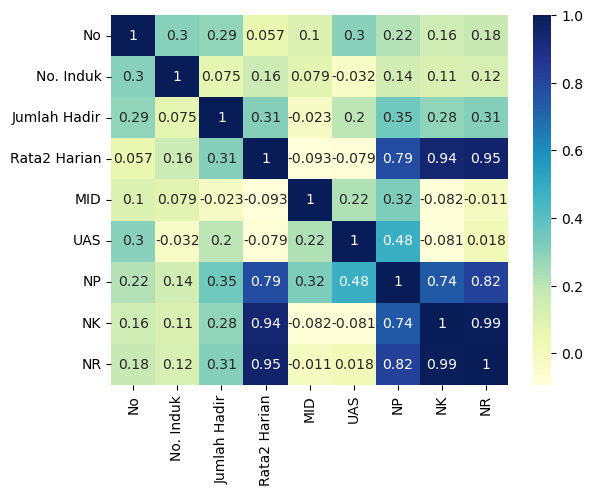

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,134.0,67.500000,38.826537,1.00,34.2500,67.50,100.7500,134.00
No. Induk,134.0,10944.134328,181.861047,10627.00,10761.2500,10953.00,11102.2500,11229.00
Jumlah Hadir,134.0,8.977612,1.223003,5.00,9.0000,9.00,10.0000,10.00
Rata2 Harian,134.0,84.140896,7.796626,21.43,83.3600,85.43,87.0700,90.71
MID,134.0,78.134328,5.431447,72.00,75.0000,75.50,80.0000,100.00
UAS,134.0,82.320896,8.887434,44.00,75.0000,83.50,88.0000,100.00
NP,134.0,82.171642,4.626706,52.00,80.0000,82.00,84.7500,93.00
NK,134.0,86.821493,9.242008,11.88,85.6300,87.50,90.0000,95.00
NR,134.0,85.429104,7.543365,24.05,84.3025,86.01,88.0175,93.12


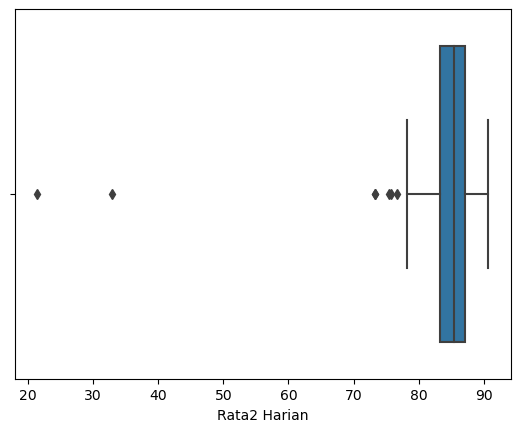

In [8]:
sns.boxplot(x=df['Rata2 Harian']);

In [9]:
dfh = df['Rata2 Harian']
dfh_Q1 = dfh.quantile(0.25)
dfh_Q3 = dfh.quantile(0.75)
dfh_IQR = dfh_Q3 - dfh_Q1
dfh_lowerend = dfh_Q1 - (1.5 * dfh_IQR)
dfh_upperend = dfh_Q3 + (1.5 * dfh_IQR)

In [10]:
dfh_outliers = dfh[(dfh < dfh_lowerend) | (dfh > dfh_upperend)]
dfh_outliers 

32     21.43
41     32.86
110    76.67
117    73.33
118    75.83
119    73.33
120    75.50
Name: Rata2 Harian, dtype: float64

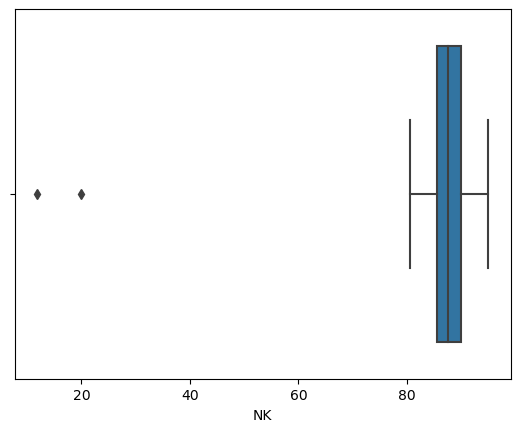

In [11]:
sns.boxplot(x=df['NK']); 

In [12]:
dfk = df['NK']
dfk_Q1 = dfk.quantile(0.25)
dfk_Q3 = dfk.quantile(0.75)
dfk_IQR = dfk_Q3 - dfk_Q1
dfk_lowerend = dfk_Q1 - (1.5 * dfk_IQR)
dfk_upperend = dfk_Q3 + (1.5 * dfk_IQR)

dfk_outliers = dfk[(dfk < dfk_lowerend) | (dfk > dfk_upperend)]
dfk_outliers 

32    11.88
41    20.00
Name: NK, dtype: float64

In [42]:
df1 = df.drop([32,41,110,117,118,119,120])

In [43]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
No,127.0,65.992126,38.385574,1.00,33.00,66.00,97.500,134.00
No. Induk,127.0,10948.330709,182.776907,10627.00,10780.50,10956.00,11104.500,11229.00
Jumlah Hadir,127.0,9.031496,1.174714,5.00,9.00,9.00,10.000,10.00
Rata2 Harian,127.0,85.401024,2.653788,78.29,84.00,85.43,87.140,90.71
MID,127.0,77.826772,4.799296,72.00,75.00,76.00,80.000,100.00
UAS,127.0,82.094488,8.916218,44.00,75.00,83.00,88.000,100.00
NP,127.0,82.677165,3.392059,72.00,80.00,83.00,85.000,93.00
NK,127.0,87.955197,2.922247,80.63,85.63,87.50,90.000,95.00
NR,127.0,86.371654,2.711891,79.66,84.44,86.27,88.255,93.12


In [14]:
y = df1['NR']
X = df1.iloc[:,[5,9]]


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [16]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (76, 2)
y_train:  (76,)
X_test:  (51, 2)
y_test:  (51,)


In [17]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [18]:
# My model's parameters:
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  3.0295187895380025
Model coefficients:  [0.19798199 0.75565357]


In [19]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' 
      + str('%.2f' % reg.coef_[0]) + '*X1 ' 
      + str('%.2f' % reg.coef_[1]) + '*X2 ')

y = 3.03 + 0.20*X1 0.76*X2 


In [20]:
y_head = reg.predict(X_train)

In [21]:
r2_score(y_train, y_head)

0.8934091183874068

In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
print(cross_val_score_train)

[0.16196888 0.96840934 0.93797419 0.90552781 0.83677811 0.88245258
 0.84310222 0.95738223 0.9090106  0.74976808]


In [23]:
cross_val_score_train.mean()

0.81523740443119

In [24]:
y_pred = reg.predict(X_test)

In [25]:
print(r2_score(y_test, y_pred))

0.9520774292849906


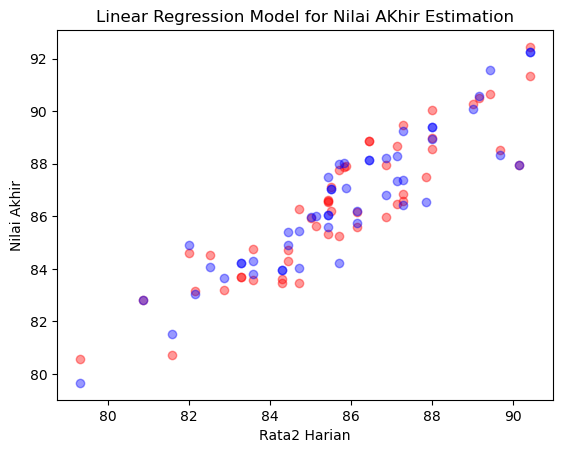

In [26]:
plt.scatter(X_test['Rata2 Harian'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Rata2 Harian'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Rata2 Harian')
plt.ylabel('Nilai Akhir')
plt.title('Linear Regression Model for Nilai AKhir Estimation');

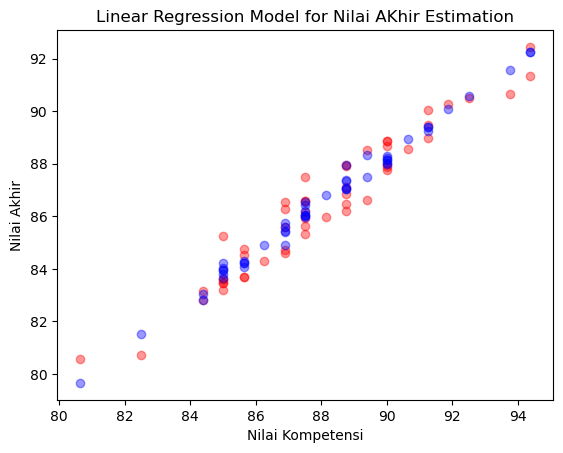

In [27]:
plt.scatter(X_test['NK'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['NK'], y_pred, color='blue', alpha=0.4)
plt.xlabel('Nilai Kompetensi')
plt.ylabel('Nilai Akhir')
plt.title('Linear Regression Model for Nilai AKhir Estimation');

In [28]:
y_pred1 = pd.DataFrame(y_pred, columns=['Estimated NR'])
y_pred1.head()

,Estimated NR
0,84.069649
1,89.405323
2,88.936817
3,86.203375
4,85.451756


In [29]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,NR
0,84.54
1,89.00
2,88.56
3,86.17
4,86.27


In [30]:
ynew = pd.concat([y_test1, y_pred1], axis=1)
ynew

,NR,Estimated NR
0,84.54,84.069649
1,89.00,89.405323
2,88.56,88.936817
3,86.17,86.203375
4,86.27,85.451756
5,83.46,84.031127
6,88.54,88.322880
7,88.86,88.149924
8,86.59,86.062808
9,86.45,87.345924


In [31]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
128,84.54,84.069649,0.470351
48,89.00,89.405323,-0.405323
75,88.56,88.936817,-0.376817
92,86.17,86.203375,-0.033375
105,86.27,85.451756,0.818244
55,83.46,84.031127,-0.571127
127,88.54,88.322880,0.217120
104,88.86,88.149924,0.710076
124,86.59,86.062808,0.527192
44,86.45,87.345924,-0.895924


In [32]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 0.4864378626802856
RMSE: 0.5723858684257256
R2 Score: 0.9520774292849906
